# Humanities Data Analysis: Case studies with Python
--------------------------------------------------
book by Folgert Karsdorp, Mike Kestemont & Allen Riddell
## Code from Chapter 1: Introduction 
From https://www.humanitiesdataanalysis.org/introduction-cook-books/notebook.html#an-exploratory-data-analysis-of-the-united-states-culinary-history

In [1]:
x = 100

In [2]:
saying = "It's turtles all the way down"

In [3]:
print(saying[0])

I


In [4]:
string = "Python"
for character in string:
    print(character)

P
y
t
h
o
n


In [5]:
numbers = [1, 1, 2, 3, 5, 8]
words = ["This", "is", "a", "list", "of", "strings"]

In [6]:
print(numbers[0])
print(numbers[-1])  # use -1 to retrieve the last item in a sequence
print(words[3:])  # use slice syntax to retrieve a subsequence

1
8
['list', 'of', 'strings']


In [7]:
packages = {'matplotlib': 'Matplotlib is a Python 2D plotting library',
            'pandas': 'Pandas is a Python library for data analysis',
            'scikit-learn': 'Scikit-learn helps with Machine Learning in Python'}

In [8]:
print(packages['pandas'])

Pandas is a Python library for data analysis


In [9]:
packages = {"matplotlib", "pandas", "scikit-learn"}

In [10]:
words = ["move", "slowly", "and", "fix", "things"]
for word in words:
    if "i" in word:
        print(word)

fix
things


In [11]:
import math

In [12]:
print(math.log(2.7183))
print(math.sqrt(2))

1.0000066849139877
1.4142135623730951


In [13]:
def count_ing(strings):
    count = 0
    for string in strings:
        if string.endswith("ing"):
            count += 1
    return count

words = [
    "coding", "is", "about", "developing", "logical", "event", "sequences"
]
print(count_ing(words))

2


In [15]:
f = open("data/aesop-wolf-dog.txt")  # open a file
text = f.read()  # read the contents of a file
f.close()  # close the connection to the file
print(text)  # print the contents of the file

THE WOLF, THE DOG AND THE COLLAR

A comfortably plump dog happened to run into a wolf. The wolf asked the dog where he had
been finding enough food to get so big and fat. 'It is a man,' said the dog, 'who gives me
all this food to eat.' The wolf then asked him, 'And what about that bare spot there on
your neck?' The dog replied, 'My skin has been rubbed bare by the iron collar which my
master forged and placed upon my neck.' The wolf then jeered at the dog and said, 'Keep
your luxury to yourself then! I don't want anything to do with it, if my neck will have to
chafe against a chain of iron!'



In [16]:
import pandas as pd

In [17]:
df = pd.read_csv("data/feeding-america.csv", index_col='date')

In [18]:
df.head()

,book_id,ethnicgroup,recipe_class,region,ingredients
date,,,,,
1922,fofb.xml,mexican,soups,ethnic,chicken;green pepper;rice;salt;water
1922,fofb.xml,mexican,meatfishgame,ethnic,chicken;rice
1922,fofb.xml,mexican,soups,ethnic,allspice;milk
1922,fofb.xml,mexican,fruitvegbeans,ethnic,breadcrumb;cheese;green pepper;pepper;salt;sar...
1922,fofb.xml,mexican,eggscheesedairy,ethnic,butter;egg;green pepper;onion;parsley;pepper;s...


In [19]:
print(len(df))

48032


In [20]:
print(df['recipe_class'].unique())

['soups' 'meatfishgame' 'fruitvegbeans' 'eggscheesedairy' 'breadsweets'
 'beverages' 'accompaniments' 'medhealth']


In [21]:
df['recipe_class'].value_counts()

breadsweets        14630
meatfishgame       11477
fruitvegbeans       7085
accompaniments      5495
eggscheesedairy     4150
soups               2631
beverages           2031
medhealth            533
Name: recipe_class, dtype: int64

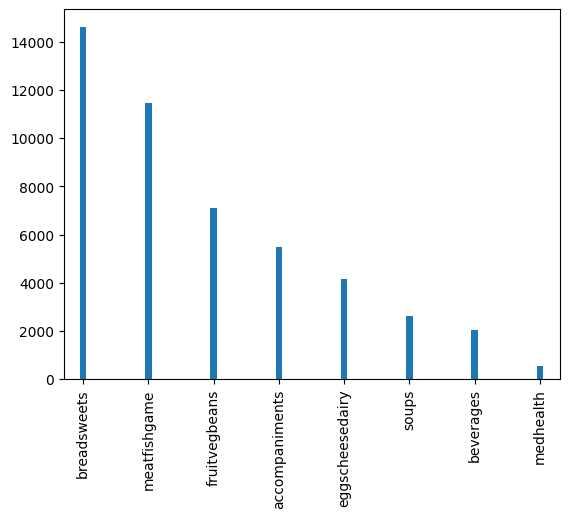

In [22]:
df['recipe_class'].value_counts().plot(kind='bar', color="C0", width=0.1);

In [23]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'year of publication')

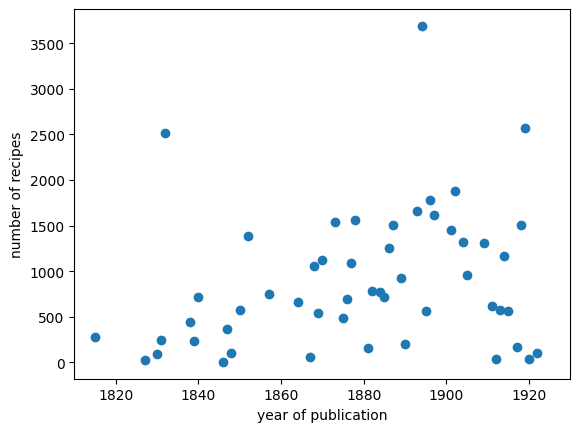

In [24]:
grouped = df.groupby('date')  # group all rows from the same year
recipe_counts = grouped.size()  # compute the size of each group
recipe_counts.plot(style='o', xlim=(1810, 1930))  # plot the group size
plt.ylabel("number of recipes")  # add a label to the y-axis
plt.xlabel("year of publication") # add a label to the x-axis

In [25]:
# split ingredient strings into lists
ingredients = df['ingredients'].str.split(';')
# group all rows from the same year
groups = ingredients.groupby('date')
# merge the lists from the same year
ingredients = groups.sum()
# compute counts per year
ingredients = ingredients.apply(pd.Series.value_counts)
# normalise the counts
ingredients = ingredients.divide(recipe_counts, 0)

In [26]:
ingredients.head()

,butter,salt,water,flour,nutmeg,pepper,sugar,lemon,mace,egg,...,tomato in hot water,farina cream,pearl grit,chicken okra,tournedo,avocado,rock cod fillet,perch fillet,lime yeast,dried flower
date,,,,,,,,,,,,,,,,,,,,,
1803,0.570796,0.435841,0.409292,0.351770,0.272124,0.267699,0.205752,0.205752,0.188053,0.150442,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1807,0.357374,0.349839,0.395048,0.219591,0.132400,0.194833,0.274489,0.104413,0.134553,0.177610,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1808,0.531401,0.371981,0.391304,0.352657,0.260870,0.149758,0.396135,0.115942,0.140097,0.294686,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1815,0.398551,0.315217,0.322464,0.431159,0.152174,0.083333,0.387681,0.018116,0.036232,0.347826,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1827,NaN,0.066667,0.600000,NaN,0.033333,0.033333,0.400000,0.200000,NaN,0.033333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


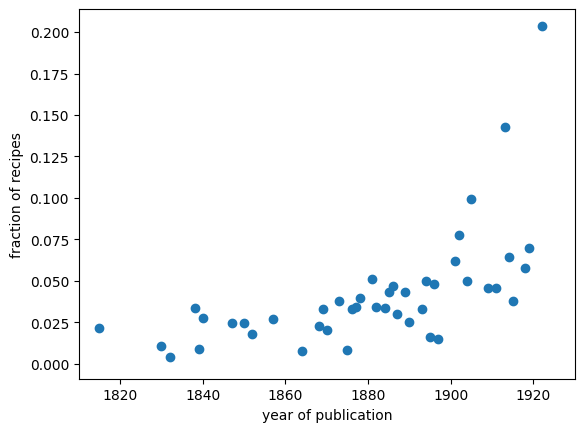

In [27]:
ax = ingredients['tomato'].plot(style='o', xlim=(1810, 1930))
ax.set_ylabel("fraction of recipes")
ax.set_xlabel("year of publication");

In [28]:
import scipy.stats

In [29]:
def plot_trend(column, df, line_color='grey', xlim=(1810, 1930)):
    slope, intercept, _, _, _ = scipy.stats.linregress(
        df.index, df[column].fillna(0).values)
    ax = df[column].plot(style='o', label=column)
    ax.plot(df.index, intercept + slope * df.index, '--',
             color=line_color, label='_nolegend_')
    ax.set_ylabel("fraction of recipes")
    ax.set_xlabel("year of publication")
    ax.set_xlim(xlim)

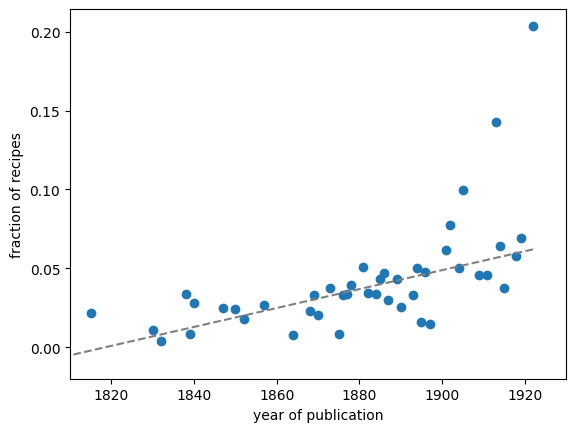

In [30]:
plot_trend('tomato', ingredients)

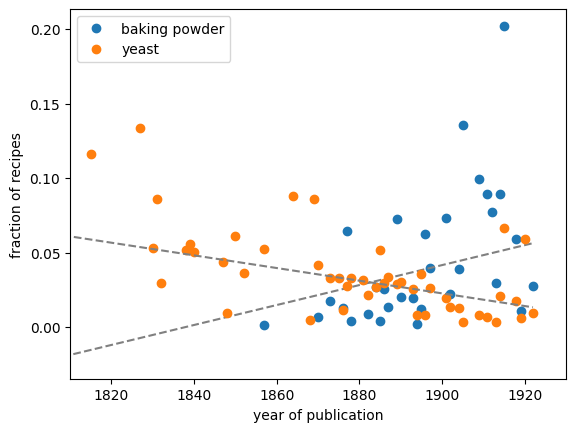

In [31]:
plot_trend('baking powder', ingredients)
plot_trend('yeast', ingredients)
plt.legend();  # add a legend to the plot

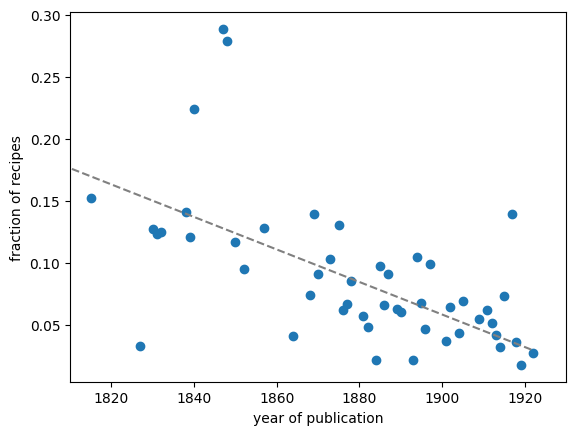

In [32]:
plot_trend('nutmeg', ingredients)

In [33]:
from sklearn.feature_selection import chi2

In [34]:
# Transform the index into a list of labels, in which each label
# indicates whether a row stems from before or after the Civil War:
labels = ['Pre-Civil War' if year < 1864 else 'Post-Civil War' for year in ingredients.index]
# replace missing values with zero (.fillna(0)),
# and compute the chi2 statistic:
keyness, _ = chi2(ingredients.fillna(0), labels)
# Turn keyness values into a Series, and sort in descending order:
keyness = pd.Series(keyness, index=ingredients.columns).sort_values(ascending=False)

In [35]:
keyness.head(n=10)

nutmeg           1.072078
rice water       1.057412
loaf sugar       1.057213
mace             0.955977
pearlash         0.759318
lemon peel       0.694849
baking powder    0.608744
soda             0.589730
vanilla          0.533900
gravy            0.453685
dtype: float64

In [36]:
# step 1: compute summed ingredient counts per year
counts = df['ingredients'].str.split(';').groupby(
    'date').sum().apply(pd.Series.value_counts).fillna(0)

In [37]:
# step 2: construct frequency rankings for pre- and post-war years
pre_cw = counts[counts.index < 1864].sum().rank(method='dense', pct=True)
post_cw = counts[counts.index > 1864].sum().rank(method='dense', pct=True)

In [38]:
# step 3: merge the pre- and post-war data frames
rankings = pd.DataFrame({'Pre-Civil War': pre_cw, 'Post-Civil War': post_cw})

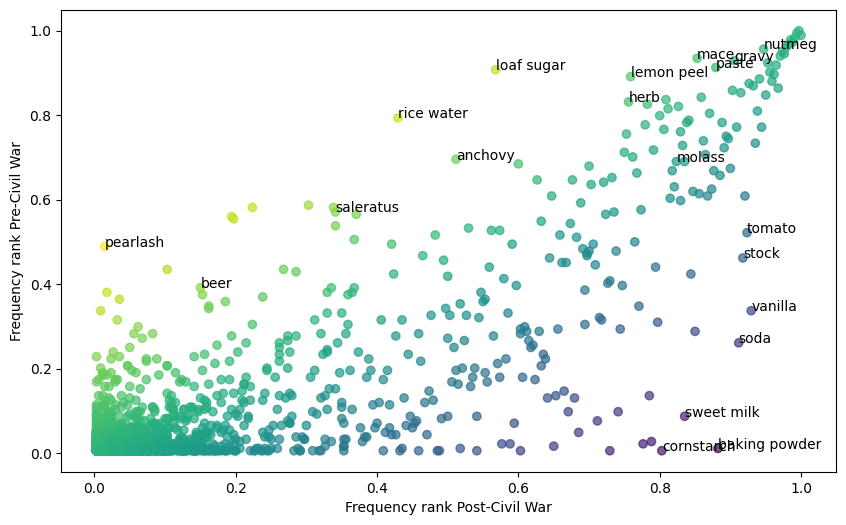

In [39]:
# step 4: produce the plot
fig = plt.figure(figsize=(10, 6))
plt.scatter(rankings['Post-Civil War'], rankings['Pre-Civil War'],
            c=rankings['Pre-Civil War'] - rankings['Post-Civil War'],
            alpha=0.7)

# Add annotations of the 20 most distinctive ingredients
for i, row in rankings.loc[keyness.head(20).index].iterrows():
    plt.annotate(i, xy=(row['Post-Civil War'], row['Pre-Civil War']))

plt.xlabel("Frequency rank Post-Civil War")
plt.ylabel("Frequency rank Pre-Civil War");

In [41]:
df['ethnicgroup'].value_counts(dropna=False).head(10)

NaN         41432
jewish       3418
creole        939
french        591
oriental      351
italian       302
english       180
german        153
spanish       123
chinese        66
Name: ethnicgroup, dtype: int64

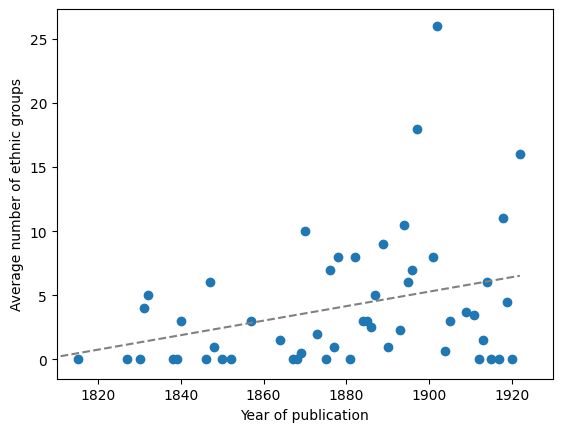

In [42]:
grouped = df.groupby(level='date')
# compute the number of unique ethnic groups per year,
# divided by the number of books
n_groups = grouped['ethnicgroup'].nunique() / grouped['book_id'].nunique()
n_groups.plot(style='o')

# add a least square line as reference
slope, intercept, _, _, _ = scipy.stats.linregress(
    n_groups.index, n_groups.fillna(0).values)

# create the plot
plt.plot(
    n_groups.index, intercept + slope * n_groups.index, '--', color="grey")
plt.xlim(1810, 1930)
plt.ylabel("Average number of ethnic groups")
plt.xlabel("Year of publication");

In [43]:
# step 1: add a new column indicating for each recipe whether
#         we have information about its ethnic group
df['foreign'] = df['ethnicgroup'].notnull()

# step 2: construct frequency rankings for foreign and general recipes
counts = df.groupby('foreign')['ingredients'].apply(
    ';'.join).str.split(';').apply(pd.Series.value_counts).fillna(0)

foreign_counts = counts.iloc[1].rank(method='dense', pct=True)
general_counts = counts.iloc[0].rank(method='dense', pct=True)

In [44]:
# step 3: merge the foreign and general data frames
rankings = pd.DataFrame({'foreign': foreign_counts, 'general': general_counts})

In [45]:
# step 4: compute the keyness of ingredients in foreign recipes
#         as the difference in frequency ranks
keyness = (rankings['foreign'] - rankings['general']).sort_values(ascending=False)

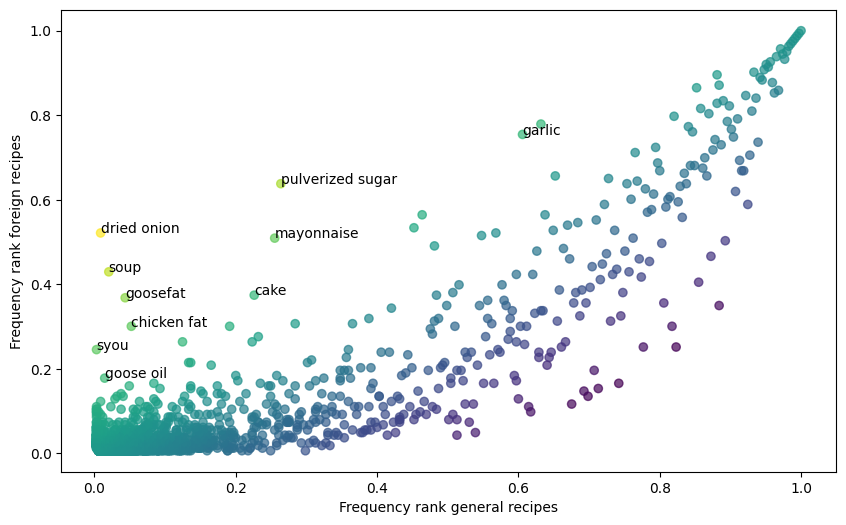

In [46]:
# step 5: produce the plot
fig = plt.figure(figsize=(10, 6))
plt.scatter(rankings['general'], rankings['foreign'],
            c=rankings['foreign'] - rankings['general'],
            alpha=0.7)

for i, row in rankings.loc[keyness.head(10).index].iterrows():
    plt.annotate(i, xy=(row['general'], row['foreign']))

plt.xlabel("Frequency rank general recipes")
plt.ylabel("Frequency rank foreign recipes");